## Задание №1
Scipy - обрезка изображения

C:\Users\user\AppData\Local\Temp\ipykernel_8172\4024229764.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


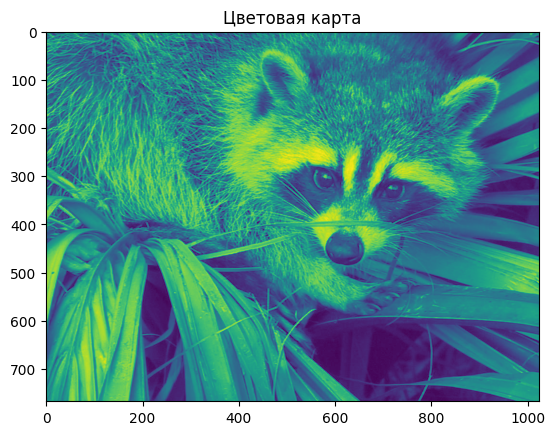

In [1]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
face = misc.face(gray=True)
plt.title('Цветовая карта')
plt.imshow(face)

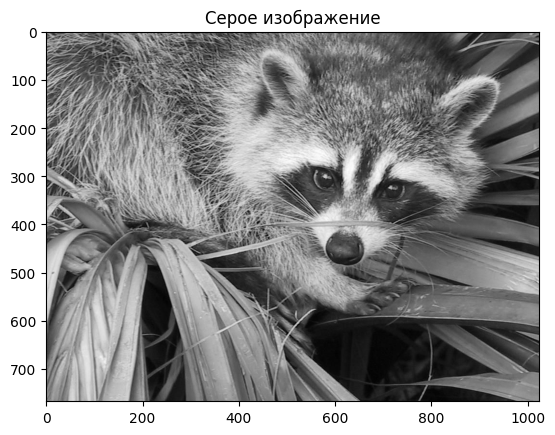

In [2]:
plt.title('Серое изображение')
plt.imshow(face, cmap=plt.cm.grey)

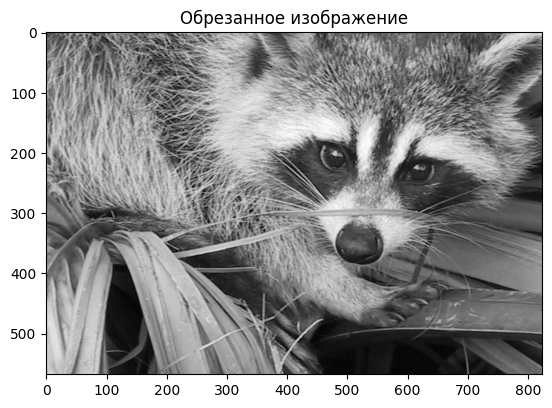

In [3]:
crop_face = face[100:-100, 100:-100]
plt.title('Обрезанное изображение')
plt.imshow(crop_face, cmap=plt.cm.grey)

In [4]:
sy, sx = face.shape 
y, x = np.ogrid[0:sy, 0:sx]
y.shape, x.shape

((768, 1), (1, 1024))

In [5]:
a, b = 300, 200
centerx, centery = (660, 300)
mask = (((y - centery)/b)**2 + ((x - centerx)/a)**2) > 1

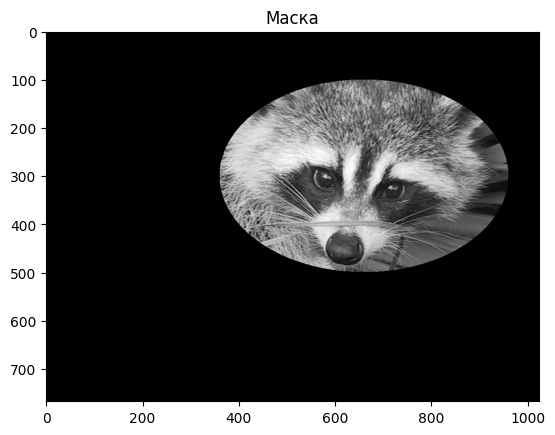

In [6]:
face[mask] = 0 
plt.title('Маска')
plt.imshow(face, cmap=plt.cm.grey)

## Задание №2
Работа со статистикой

#### 1) mean (среднее) и std (стандартная девиация) значение численности популяций каждого вида за годы периода.

In [7]:
data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')
year, hares, lynxes, carrots = data.T 
populations = data[:,1:]

In [8]:
print("      Hares          Lynxes         Carrots")
print("Mean",populations.mean(axis=0))
print("Std:",populations.mean(axis=0))

      Hares          Lynxes         Carrots
Mean [34080.95238095 20166.66666667 42400.        ]
Std: [34080.95238095 20166.66666667 42400.        ]


#### 2) В каком году популяция каждого вида была наибольшей?

In [9]:
j_max_years = np.argmax(populations,axis=0)
print(f"Наибольшая популяция Hares в {int(year[j_max_years][0])}")
print(f"Наибольшая популяция Lynxes в {int(year[j_max_years][1])}")
print(f"Наибольшая популяция Carrots в {int(year[j_max_years][2])}")

Наибольшая популяция Hares в 1903
Наибольшая популяция Lynxes в 1904
Наибольшая популяция Carrots в 1900


#### 3) Какой вид имеет наибольшую популяцию за каждый год? (argsort и np.array(['H', 'L', 'C']))


In [10]:
max_species = np.argmax(populations,axis=1)
species=np.array(['Hare','Lynx','Carrot'])
print("Максимальная популяция по годам:")
for i in range(len(year)):
    print(f"{int(year[i])}: {species[max_species][i]}")

Максимальная популяция по годам:
1900: Carrot
1901: Carrot
1902: Hare
1903: Hare
1904: Lynx
1905: Lynx
1906: Carrot
1907: Carrot
1908: Carrot
1909: Carrot
1910: Carrot
1911: Carrot
1912: Hare
1913: Hare
1914: Hare
1915: Lynx
1916: Carrot
1917: Carrot
1918: Carrot
1919: Carrot
1920: Carrot


#### 4) В какие годы любая из популяций превышает 50000? (Подсказка: сравнение и np.any)

In [11]:
above_50000 = np.any(populations > 50000, axis=1)
if len(above_50000) == 0:
    print("Нет годов, в которых хотя бы одна из популяций превышает 50 000.")
else:
    print(f"Годы, в которых хотя бы одна из популяций превышает 50 000:")
    for i in year[above_50000]:
        print(int(i))

Годы, в которых хотя бы одна из популяций превышает 50 000:
1902
1903
1904
1912
1913
1914
1915


#### 5) Топ 2 года для каждого вида, когда его популяции были самыми низкими. (argsort).


In [12]:
j_top_2 = np.argsort(populations, axis=0)[:2]
print("Топ 2 года с самой низкой популяцией") 
print(f"Hare: {int(year[j_top_2][0][0])}, {int(year[j_top_2][1][0])}")
print(f"Lynx: {int(year[j_top_2][0][1])}, {int(year[j_top_2][1][1])}")
print(f"Carrot: {int(year[j_top_2][0][2])}, {int(year[j_top_2][1][2])}")

Топ 2 года с самой низкой популяцией
Hare: 1917, 1916
Lynx: 1900, 1901
Carrot: 1916, 1903


#### 6) Сравните (постройте график) изменения численности зайцев (см. help(np.gradient)) и численности рысей. Проверьте корреляцию (см. help(np.corrcoef)).

In [13]:
hare_grad = np.gradient(hares, 1.0)
print(f"Разница изменения численности зайцев и численности рысей {np.corrcoef(hare_grad,lynxes)[0,1]}")

Разница изменения численности зайцев и численности рысей -0.9179248480315341


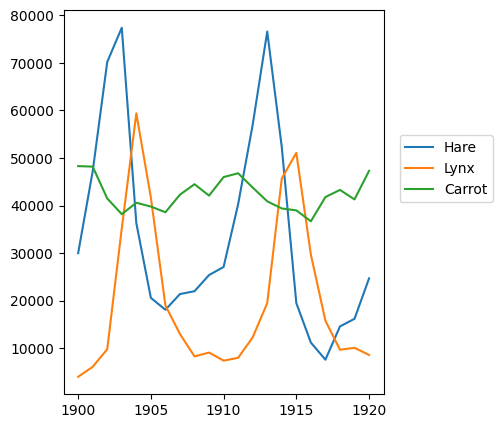

In [14]:
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

## Задание №3
Множество Мандельброта

In [15]:
from numpy import newaxis

def compute_maldelbrot(N_max, some_threshold, nx, ny):
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    c = x[:,newaxis]+1j * y[newaxis, :]
    z = c
    
    for j in range(N_max):
        z = z ** 2 + c
    mandelbrot_set = (abs(z) < some_threshold)   

    return mandelbrot_set

In [16]:
mandelbrot_set = compute_maldelbrot(70, 70. , 601, 401)

C:\Users\user\AppData\Local\Temp\ipykernel_8172\2519335022.py:10: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\user\AppData\Local\Temp\ipykernel_8172\2519335022.py:10: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


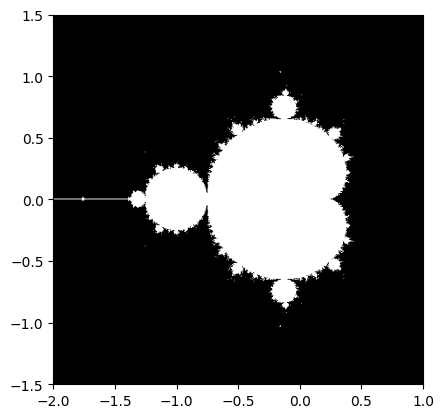

In [17]:
plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5])
plt.gray()